<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-prix-de-l'immobilier" data-toc-modified-id="Le-prix-de-l'immobilier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le prix de l'immobilier</a></span><ul class="toc-item"><li><span><a href="#Régression-linéaire-simple" data-toc-modified-id="Régression-linéaire-simple-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Régression linéaire simple</a></span></li><li><span><a href="#Régression-linéaire-multiple" data-toc-modified-id="Régression-linéaire-multiple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Régression linéaire multiple</a></span></li><li><span><a href="#Termes-d'interaction" data-toc-modified-id="Termes-d'interaction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Termes d'interaction</a></span></li><li><span><a href="#Transformations-non-linaires-des-prédicteurs" data-toc-modified-id="Transformations-non-linaires-des-prédicteurs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transformations non-linaires des prédicteurs</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from LinearRegression_in_Python_like_in_R_2023 import lm, summary, vif

La librairie `LinearRegression_in_Python_like_in_R` a été développée pour ce TP et vous permet d'utiliser *grosso modo* les mêmes méthodes qu'en R. Vous pourrez consulter avec intérêt le code source. 
Pour créer un modèle de régression linéaire, il vous suffit de faire des opérations similaires à
```
>> model = lm('response ~ predictor1 + predictor2)
```
Vous disposerez ensuite de méthodes pour obtenir le résultat et les performances `model.summary()` ou `summary(model)`, pour afficher les graphes de diagnostic `model.plot()`. 
Pour tracer des scatter plots, vous pourrez par exemple utiliser la méthode `sns.scatterplot()` de la librairie seaborn. 

In [2]:
%matplotlib inline

# Le prix de l'immobilier

On s'intéresse dans cette partie au prix de l'immobilier à Boston. Ces données sont fournies dansle fichier `Boston.csv` que vous pourrez charger à l'aide de `pd.read_csv()`. Vous pourrez ensuite obtenir la description de ce jeu de données en exécutant les trois lignes de code qui affichent le fichier markdown `Boston.md`. 

Chargez ces données, consultez l'aide. L'enjeu va être ici de prédire le prix de l'immobilier en fonction des paramètres disponibles. Pour cela, il va donc nous falloir construire un modèle le mieux adapté possible à cette tâche. Ce TP est issu du livre ISLR, page 109 et suivantes. 

In [3]:
# lecture du fichier csv dans un dataframe Boston
df = pd.read_csv("Boston.csv")

In [4]:
with open("Boston.md",'r') as f:
    boston_description = f.read()
from IPython.display import Markdown
Markdown(boston_description)

# Boston House Prices dataset

Notes
------
Data Set Characteristics:  

- Number of Instances: 506 
- Number of Attributes: 13 numeric/categorical predictive
- Median Value (attribute 14) is usually the target
- Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in \$1000's

- Missing Attribute Values: None
- Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


In [5]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Régression linéaire simple

Vous débuterez par une régression linéaire simple de `medv` (le prix moyen) en fonction de la pauvreté de la population environnante. Vous utiliserez la fonction `lm`. Afficher le résumé du modèle, par `summary(model)` ou `model.summary()`, et tracez les graphes de diagnostic. Que peut-on en déduire ?


In [6]:
# model1
model1 = lm(formula='medv ~ lstat', data = df)

In [7]:
model1.summary()

Call
smf.ols('medv ~ lstat', data=...)

Coefficients:
            Estimate  Std. Error    t value       Pr(>|t|) code
Intercept  34.553841    0.562627  61.415146  3.743081e-236  ***
lstat      -0.950049    0.038733 -24.527900   5.081103e-88  ***

Residuals:
         Min        1Q    Median        3Q        Max
0 -15.167452 -3.989612 -1.318186  2.033701  24.500129
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.2158 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.543 
F-statistic: 601.618 on 1 and 504 DF,  p-value: 5.081e-88


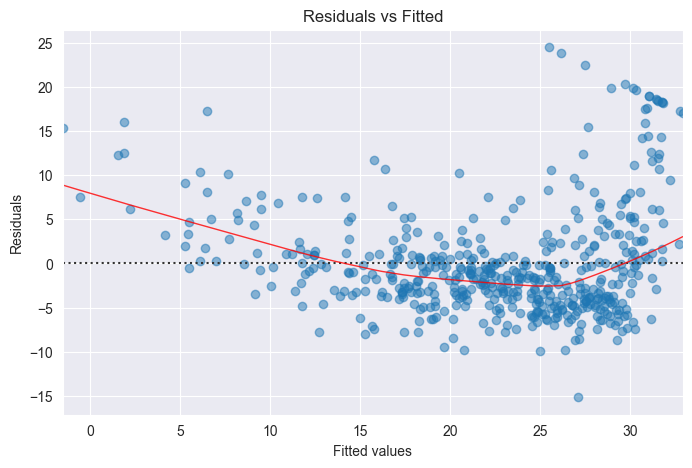

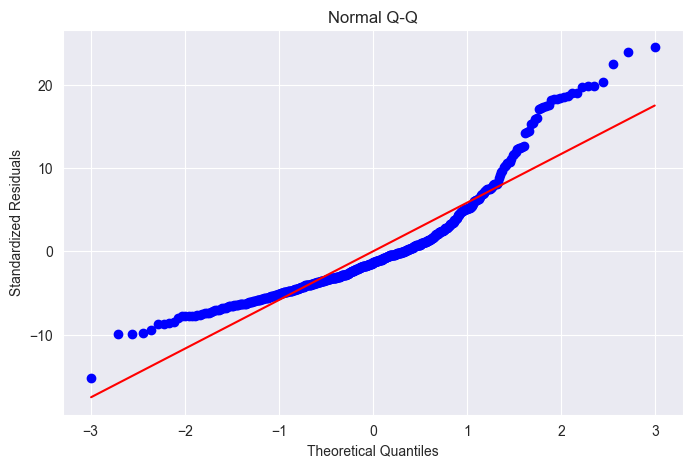

In [8]:
model1.plot()

Ces différents graphiques suggèrent une certaine non-linéarité dans la relation `medv~lstat`. Nous considèrerons cela plus attentivement dans la suite.  

L'intervalle de confiance pour les coefficients peut être obtenu avec la méthode `.conf_int()`. Regardez de quoi il s'agit. 

Prédire les prix pour lstat valant 5, 10 puis 15, ainsi que les intervalles à 5% correspondants. Pour les intervalles de confiance, vous utiliserez les commandes
```
res = model1.get_prediction(newdata)
res.summary_frame()
```

Une explication de la différence entre ces deux types d'intervalles [ici](http://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals).

In [9]:
model1.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [10]:
newdata = pd.DataFrame({'lstat' : [5, 10, 15]})

In [11]:
res = model1.get_prediction(newdata)
res.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [12]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Finalement, tracez le nuage de point et la droite de régression. Vous pourrez faire cela en utilisant la fonction `sns.lmplot`

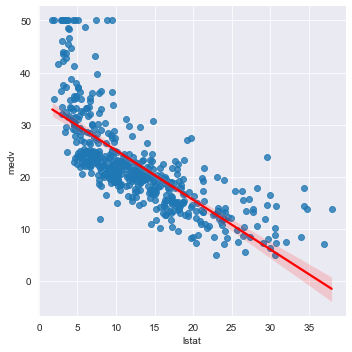

In [13]:
sns.lmplot(x='lstat', y='medv', data=df, line_kws={'color': 'red'})

## Régression linéaire multiple

Effectuer une régression linéaire multiple de `medv` en fonction de `lstat` et `age`. Examiner quelles sont les $p$-values associées aux deux prédicteurs. Effectuer ensuite une régression sur l'ensemble des prédicteurs (utiliser le fait que `lm('y ~ .')`effectue la régression de y sur l'ensemble des variables). Que deviennent les $p$-values des deux prédicteurs précédents ? Quelles sont les variables qui paraissent pertinentes ?

In [14]:
model2 = lm(formula='medv ~ lstat + age', data=df)

In [15]:
model2.summary()

Call
smf.ols('medv ~ lstat + age', data=...)

Coefficients:
            Estimate  Std. Error    t value       Pr(>|t|) code
Intercept  33.222761    0.730847  45.457881  2.943785e-180  ***
lstat      -1.032069    0.048191 -21.416330   8.419554e-73  ***
age         0.034544    0.012225   2.825605   4.906776e-03   **

Residuals:
         Min       1Q    Median        3Q        Max
0 -15.981243 -3.97747 -1.283443  1.968309  23.158419
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.1731 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.549 
F-statistic: 308.969 on 2 and 503 DF,  p-value: 2.982e-88


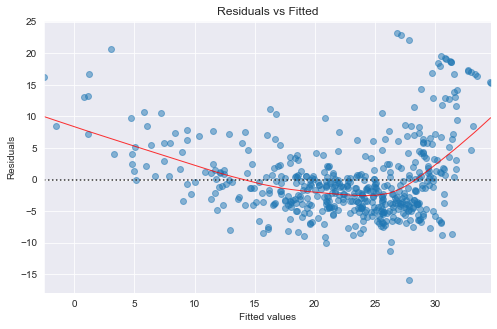

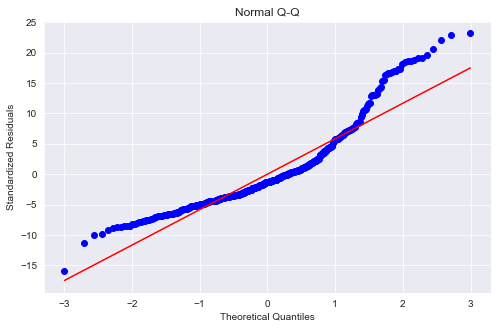

In [16]:
model2.plot()

In [17]:
model3 = lm(formula='medv ~ .', data=df)

In [18]:
model3.summary()

Call
smf.ols('medv ~ .', data=...)

Coefficients:
            Estimate  Std. Error    t value      Pr(>|t|) code
Intercept  36.459488    5.103459   7.144074  3.283438e-12  ***
crim       -0.108011    0.032865  -3.286517  1.086810e-03   **
zn          0.046420    0.013727   3.381576  7.781097e-04  ***
indus       0.020559    0.061496   0.334310  7.382881e-01     
chas        2.686734    0.861580   3.118381  1.925030e-03   **
nox       -17.766611    3.819744  -4.651257  4.245644e-06  ***
rm          3.809865    0.417925   9.116140  1.979441e-18  ***
age         0.000692    0.013210   0.052402  9.582293e-01     
dis        -1.475567    0.199455  -7.398004  6.013491e-13  ***
rad         0.306049    0.066346   4.612900  5.070529e-06  ***
tax        -0.012335    0.003761  -3.280009  1.111637e-03   **
ptratio    -0.952747    0.130827  -7.282511  1.308835e-12  ***
black       0.009312    0.002686   3.466793  5.728592e-04  ***
lstat      -0.524758    0.050715 -10.347146  7.776912e-23  ***

Resi

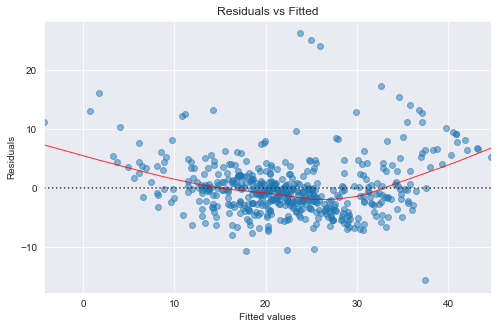

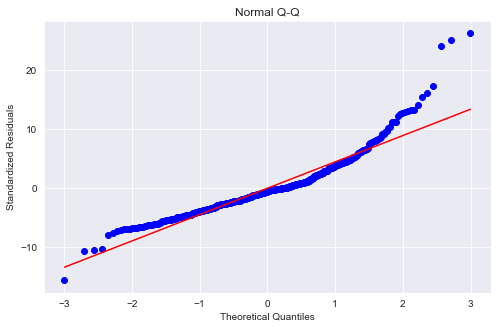

In [19]:
model3.plot()

Examiner le VIF des différents *prédicteurs*. On vous a préparé une fonction `vif` que vous pouvez utiliser telle que. 
Il faut sans doute retirer la colonne `medv` du tableau à passer, car ce n'est pas un pédicteur, mais la réponse.

In [20]:
vif(df.drop('medv', axis=1))

,VIF
crim,1.792192
zn,2.298758
indus,3.991596
chas,1.073995
nox,4.393720
rm,1.933744
age,3.100826
dis,3.955945
rad,7.484496
tax,9.008554


On peut donc supposer que les variables `age` et  `indus` sont inutiles. Effectuer une régression linéaire en supprimant d'abord `age`, puis  `age` et  `indus`. Surveillez les valeurs de R-squared et de Adjusted R-Squared. Utiliser le fait que `lm(y~ .-x)` effectue la régression sur `.` sauf `x`). 

In [21]:
# model4 

In [22]:
# model5 

## Termes d'interaction

Puisqu'on soupçonne qu'il y ait une non-linéarité dans le modèle (à partir de l'examen des résidus), commençons par tester si des termes d'interaction peuvent approrter quelque chose. La syntaxe `lstat:black` permet d'inclure un terme d'interaction entre
lstat et black. La syntaxe `lstat*age` inclue simultanément `lstat`, `age`,
et `lstat:age`. Examinez que deviennent les résultats en incluant un terme d'interaction en `lstat` et `age`, puis entre `crim` et `dist`. Ces approches, ou l'une d'entre elles, apportent-elles quelque chose ?

Il est possible de générer automatiquement des termes d'interaction par la syntaxe `(a+b+c)**2`  (`^2` en R), qui va générer les termes d'interaction `a:b`, `a:c`, et `b:c`. Appliquer cette technique pour faire la régression sur l'ensemble des variables, sauf `age`  et `indus` et en ajoutant les interaction entre `dis`, `crim`, `chas`, et `tax`.  Comment évoluent les performances du modèle ? Quelles sont les variables à retenir ?

Enfin, on peut aussi considérer l'ensemble des interactions possibles en effectuant un régression avec un terme `(.)**2`. Comment évoluent alors les R2 ? Quelles sont les variables à retenir ?

In [23]:
pd.options.display.max_rows = 999  # augmente le nombre de lignes affichées
 

## Transformations non-linaires des prédicteurs


Il est possible d'effectuer n'importe quelle transformation de chacun des prédicteurs. Etant donné un prédicteur $X$, on peut créer un nouveau prédicteur  $X^2$ en utilisant la fonction I(X\*\*2). On doit utiliser I() car \*\* est là pour les termes d'interaction... Utiliser ceci pour faire une régression de medv sur lstat et lstat**2. Comparer aux résultats sans le terme quadratique. 

On peut générer les prédicteurs correspondants aux différents termes d'un polynôme via la fonction `poly(x,n)`. Utiliser cette fonction pour effectuer une régression de `medv` vis-à-vis de `lstat` au degré 7, en construisant la formule comme la concaténaion de chaines de caractères. Quels paraissent être les coefficients importants ?

In [24]:
def poly(x,n):
    return '+'.join(['I('+x+'**'+str(k)+')' for k in range(1,n+1)])

Pour ajouter à la fois des termes polynomiaux et des termes d'interaction, en R vous pourriez utiliser la fonction polym. Pas d'équivalent simple en python, mais cela ne vous empèchera néanmoins pas de considérer une régression sur l'ensemble des variables, plus les carrés de `lstat` et `crim`, et le terme d'interaction. Quelles sont les variables à retenir ?